### Install Required Packages

We would be running `Stable Diffusion 2` so enable `GPU` under `View Resources > Change runtime type`

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-110351ac-25c5-2fd1-a9c4-d26269e12ae1)


In [2]:
%%capture
!pip install diffusers
!pip install accelerate
!pip install daam==0.0.12
!pip install git+https://github.com/RishiDarkDevil/daam-i2i.git
!pip install git+https://github.com/RishiDarkDevil/TITAN.git

In [3]:
# !pip uninstall -y daami2i
# !pip uninstall -y daam
# !pip install git+https://github.com/RishiDarkDevil/daam-i2i.git

In [4]:
# !git clone https://github.com/RishiDarkDevil/daam-i2i.git
# %cd daam-i2i
# !git clone https://github.com/castorini/daam.git
# %cd daam

### Import Necessary Libraries

In [1]:
# Plotting
from matplotlib import pyplot as plt

# Data Handling
import numpy as np

# Image Processing
import cv2
from PIL import Image

# Image Generation
from diffusers import StableDiffusionPipeline

# Heatmap generation
import daam
import daami2i

# Model
import torch

# annotations
import titan

### Load Model

In [2]:
DEVICE = 'cuda' # device

Now, let's load the `stabilityai/stable-diffusion-2-base` diffusion model.

In [3]:
model = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-base')
model = model.to(DEVICE) # Set it to something else if needed, make sure DAAM supports that

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

### DAAMI2I Image Attention

In [4]:
prompt = ['People standing in front of a truck filled with cotton']

In [9]:
processed_prompt = titan.PromptHandler().clean_prompt(prompt)

Loading Models...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Done
Tokenizing...Done
POS Tagging and Lemmatizing...Done
Processing...Done


In [10]:
# process the prompt for words, etc
prompt, cleaned_prompt, objects = processed_prompt[0]
processed_prompt

[('astronaut on moon riding horse .',
  ['astronaut', 'moon', 'riding', 'horse'],
  ['astronaut', 'moon', 'riding', 'horse'])]

In [5]:
# prints image attn slice dims
# tracing all the attentions throughout the model while generating image
with daam.trace(model) as daam_trc, daami2i.trace(model, track_all=True) as daami2i_trc:
  output_image = model(prompt).images[0]
  image_all_heat_map = daami2i_trc
  word_all_heat_map = daam_trc

  0%|          | 0/51 [00:00<?, ?it/s]

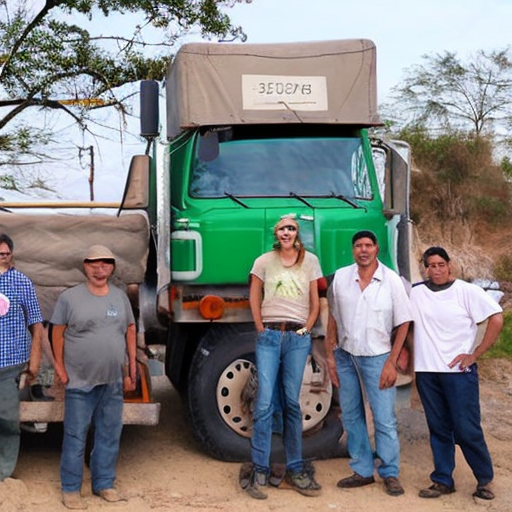

In [6]:
output_image

In [7]:
image_global_heat_map = image_all_heat_map.compute_global_heat_map([1], None, None)
word_global_heat_map = word_all_heat_map.compute_global_heat_map(None, None, None)

In [21]:
def diffuse_from_pixel(pixel_id, num_diffuse, thresh = 0):
  epicenter = image_global_heat_map.compute_pixel_heat_map(pixel_id).heatmap
  epicenter[epicenter < thresh] = 0
  plt.imshow(epicenter) # Initial Pixel Heatmap
  plt.show()
  for _ in range(num_diffuse):
    epicenter = image_global_heat_map.compute_guided_heat_map(epicenter).heatmap
    epicenter[epicenter < thresh] = 0
    plt.imshow(epicenter)
    plt.show()

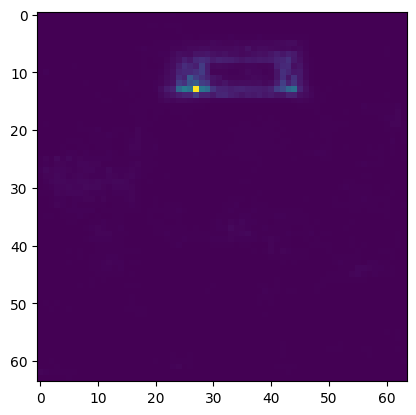

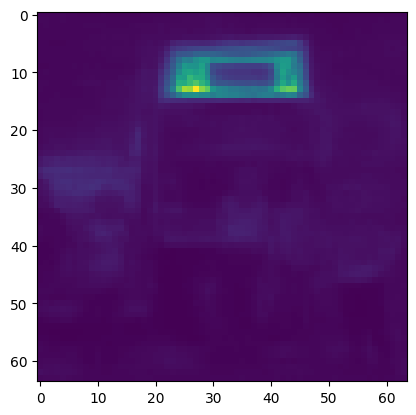

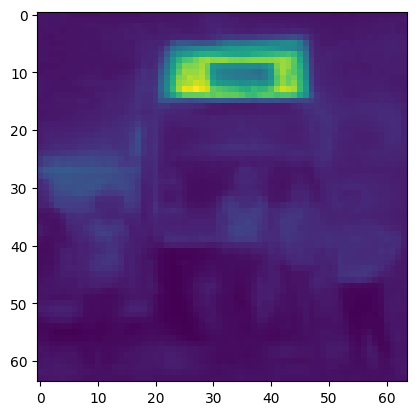

In [22]:
NUM_DIFFUSE = 2
PIXEL_ID = 987 - 128 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE)

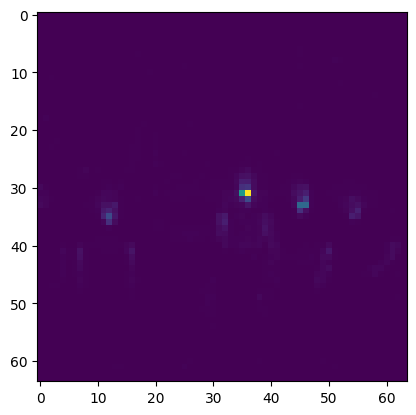

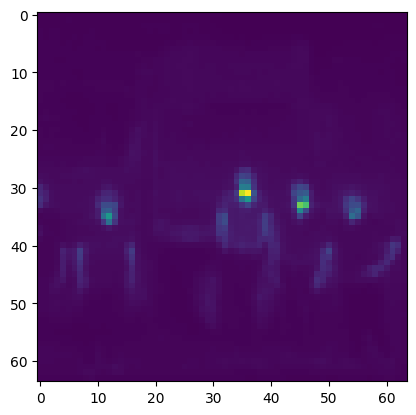

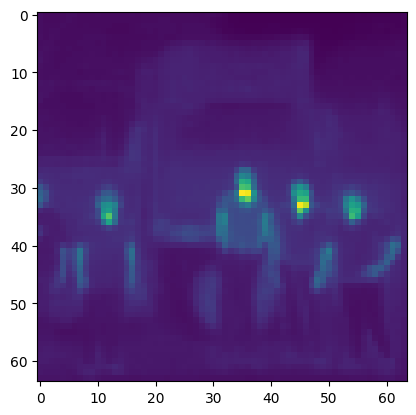

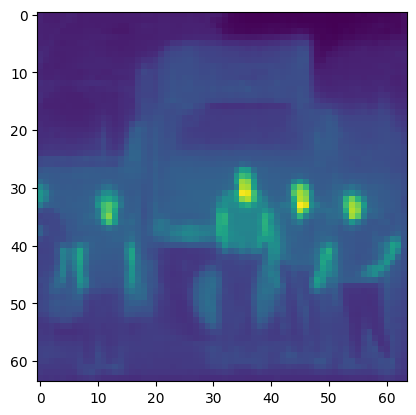

In [23]:
NUM_DIFFUSE = 3
PIXEL_ID = 2048-28 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE)

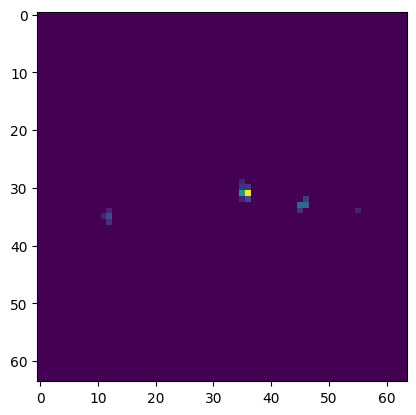

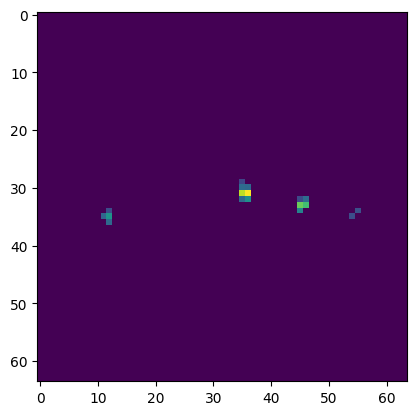

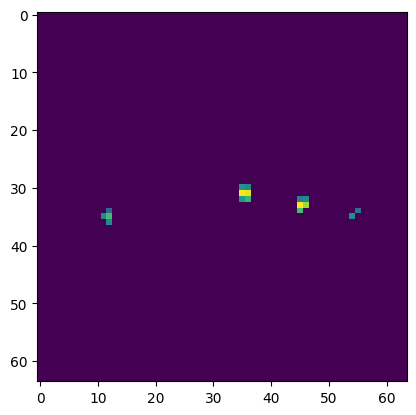

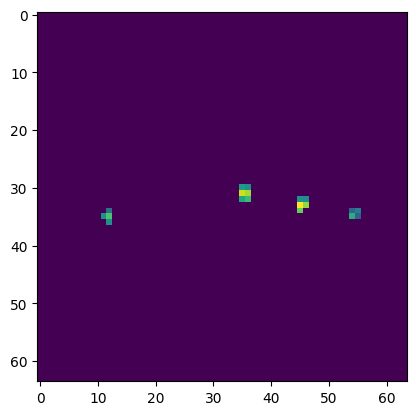

In [35]:
NUM_DIFFUSE = 3
PIXEL_ID = 2048-28 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.3)

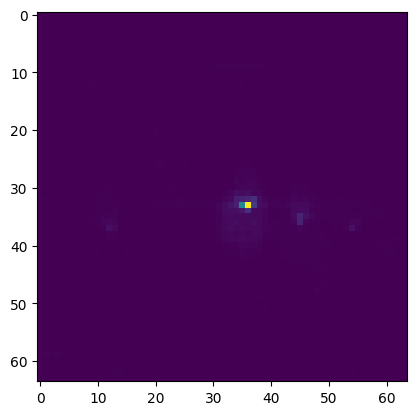

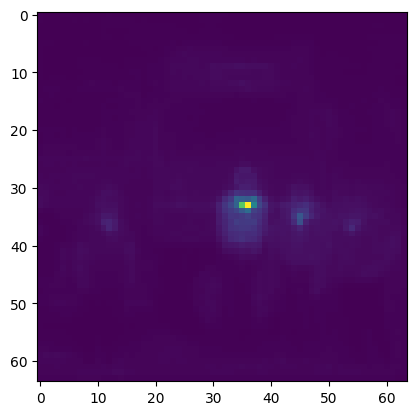

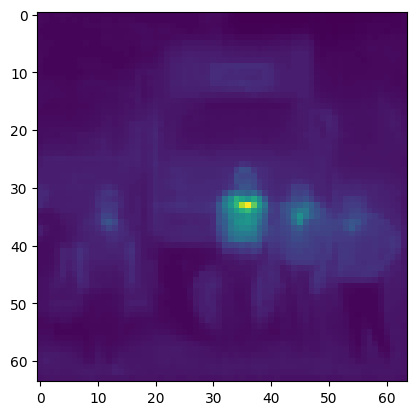

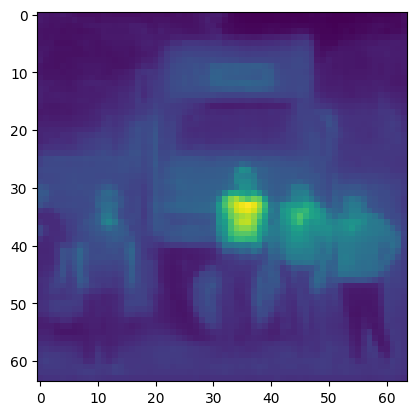

In [19]:
NUM_DIFFUSE = 3
PIXEL_ID = 2048-28 + 128 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE)

In [50]:
def diffuse_from_pixel(pixel_id, num_diffuse, thresh = 0):
  epicenter = image_global_heat_map.compute_pixel_heat_map(pixel_id).heatmap
  plt.imshow(epicenter) # Initial Pixel Heatmap
  plt.show()
  epicenter[epicenter < epicenter.min()+thresh] = 0
  for _ in range(num_diffuse):
    epicenter = image_global_heat_map.compute_guided_heat_map(epicenter).heatmap
    plt.imshow(epicenter)
    plt.show()
    epicenter[epicenter < epicenter.min()+thresh] = 0
  plt.imshow(epicenter)
  plt.show()

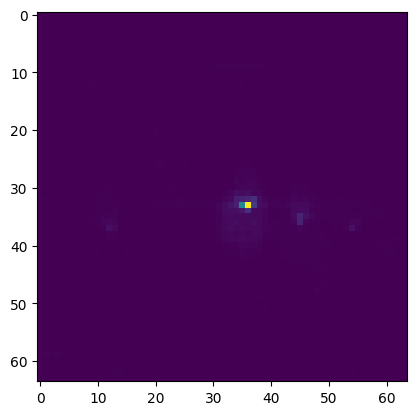

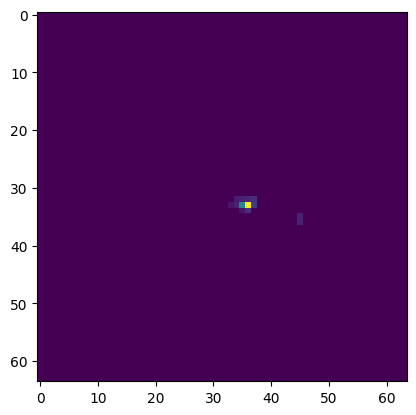

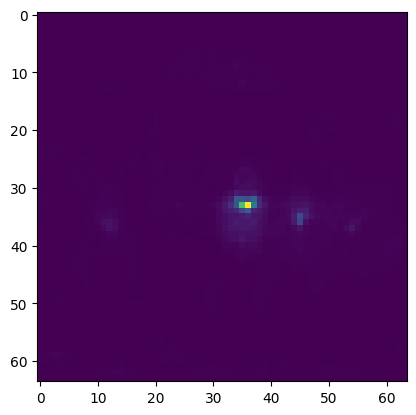

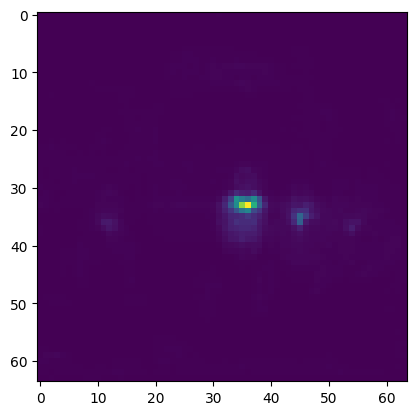

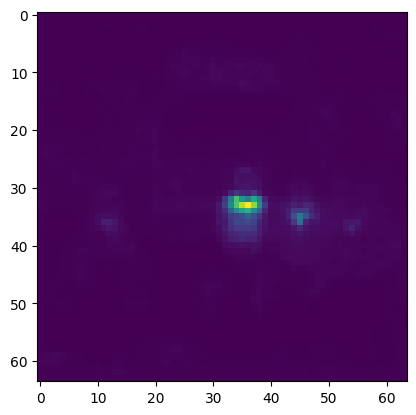

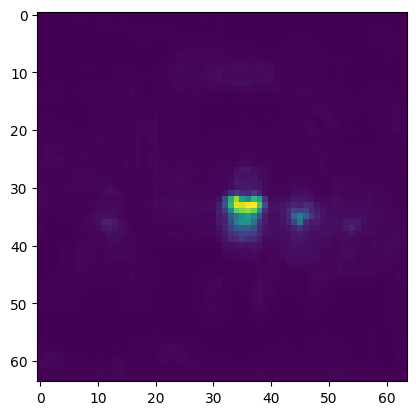

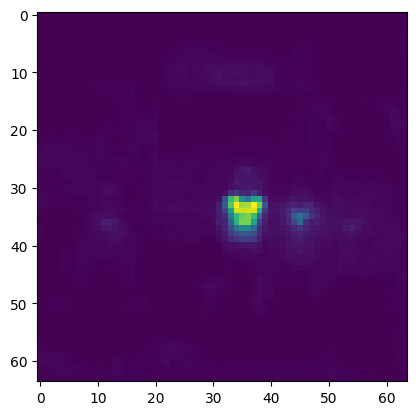

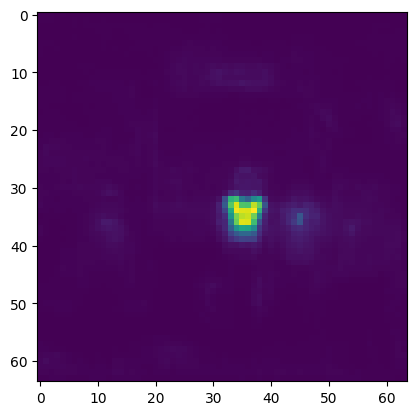

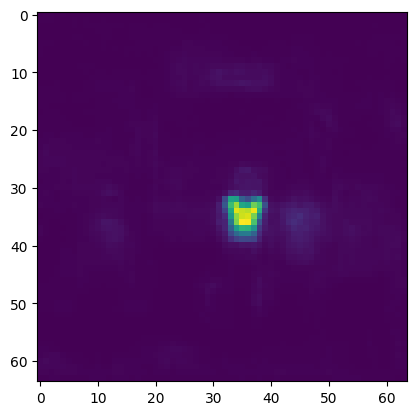

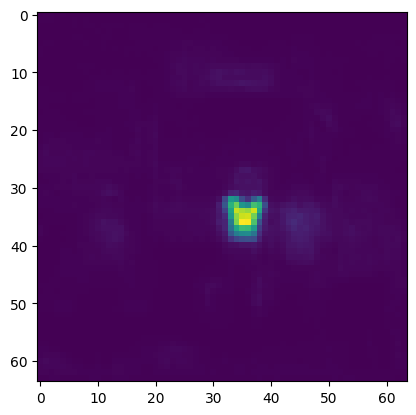

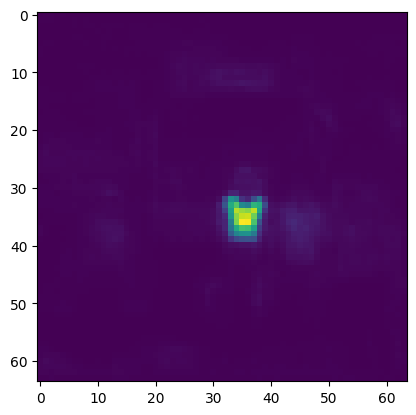

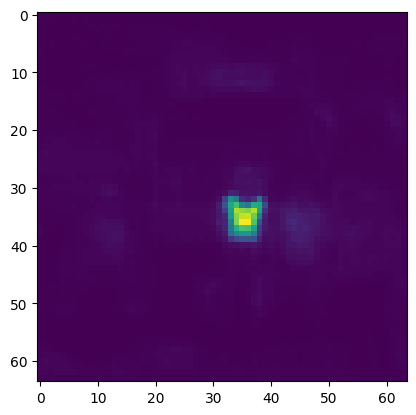

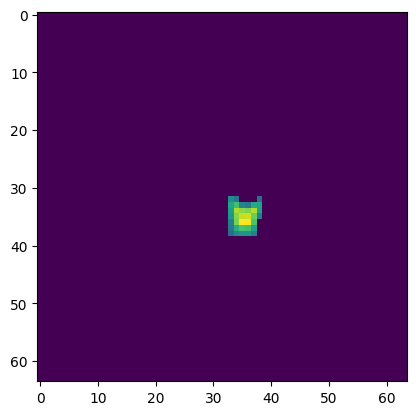

In [48]:
NUM_DIFFUSE = 10
PIXEL_ID = 2048-28 + 128 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.2)

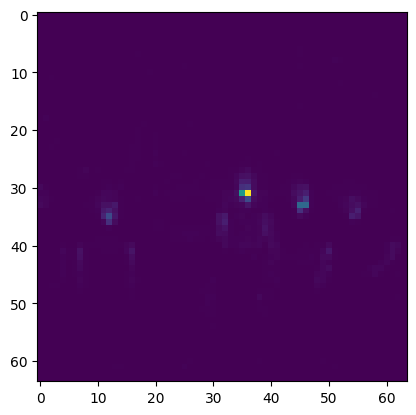

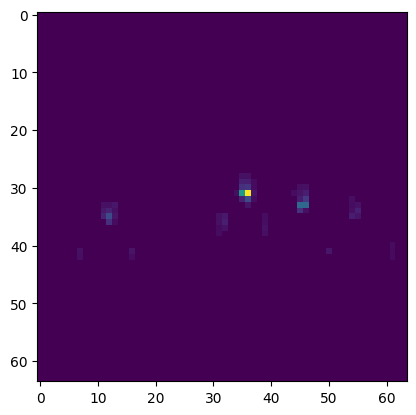

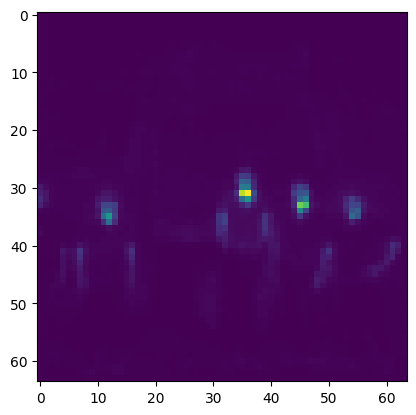

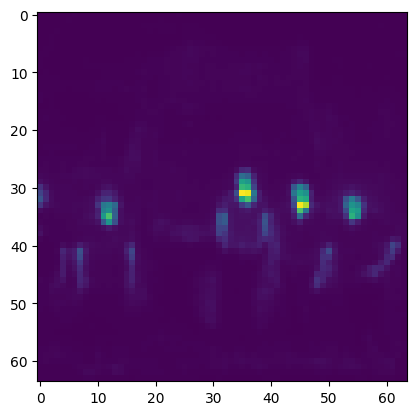

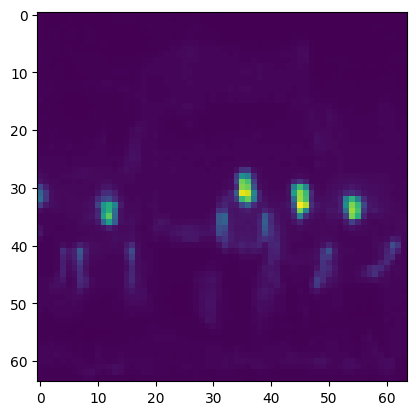

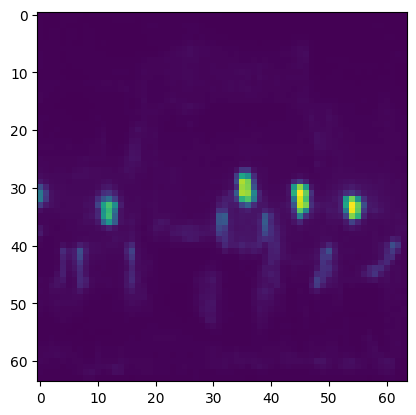

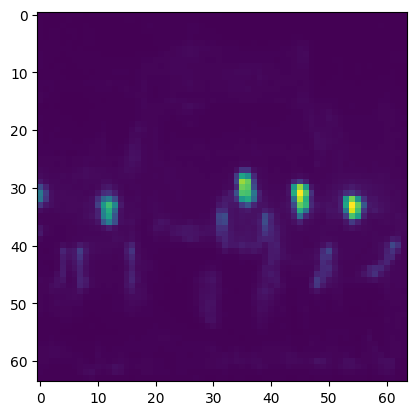

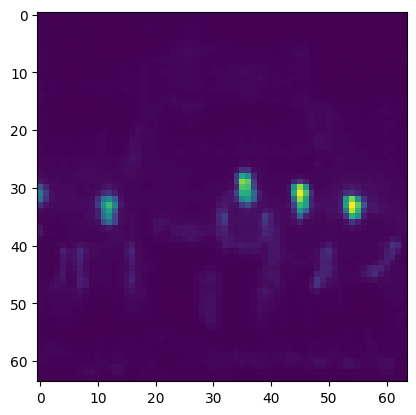

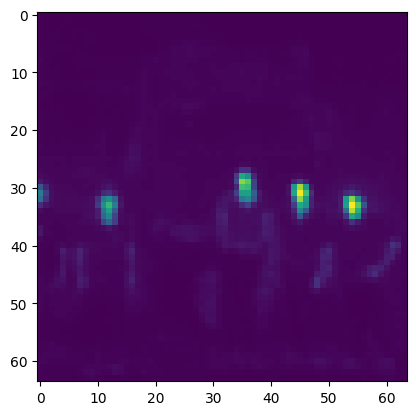

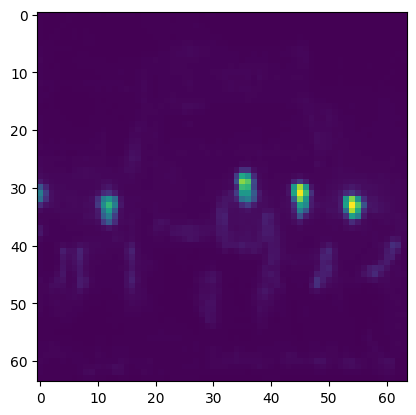

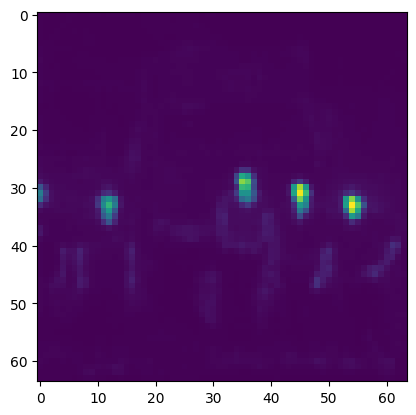

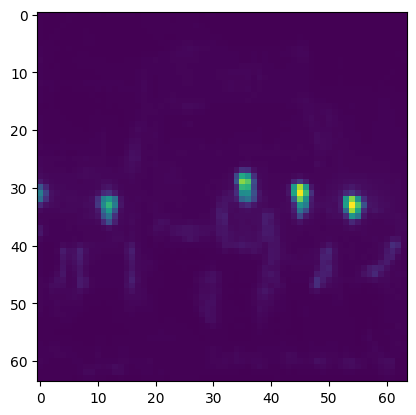

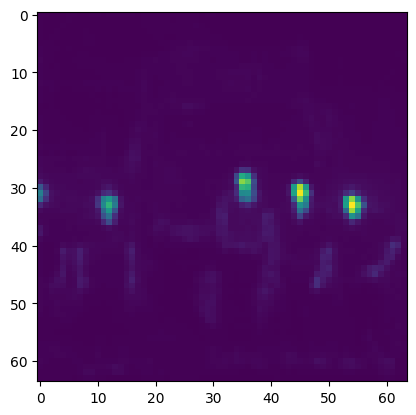

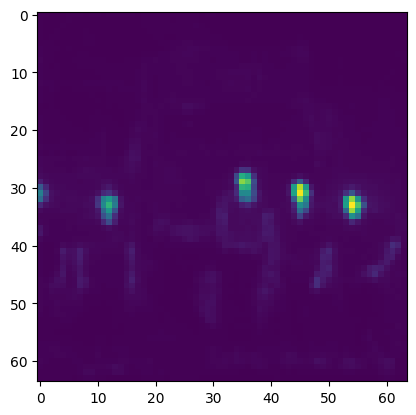

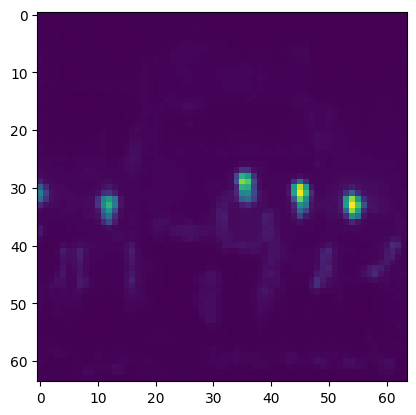

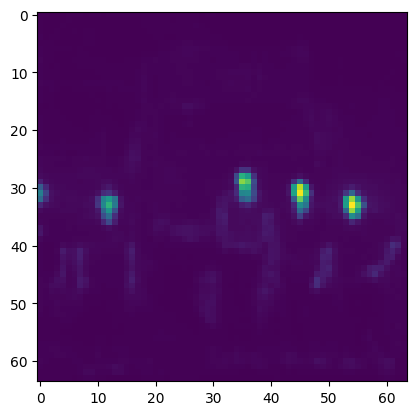

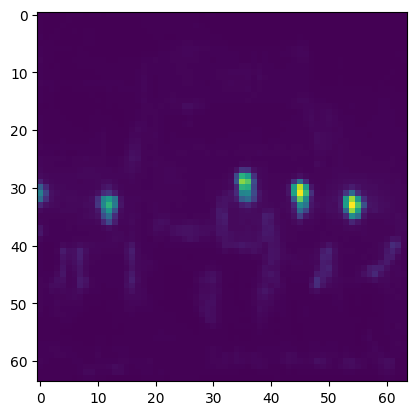

In [46]:
NUM_DIFFUSE = 15
PIXEL_ID = 2048-28 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.1)

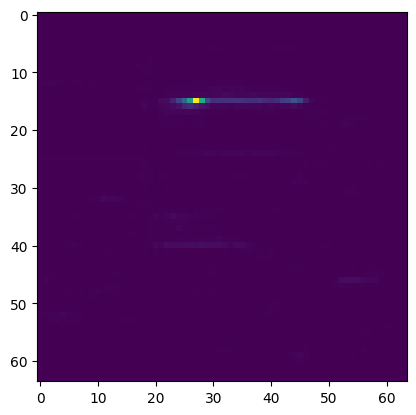

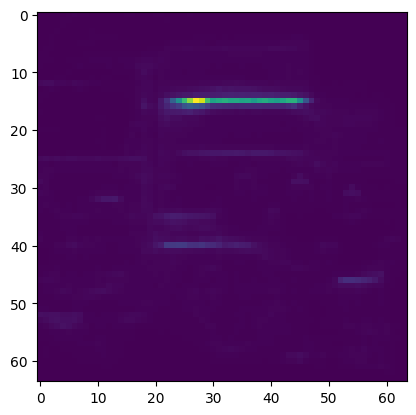

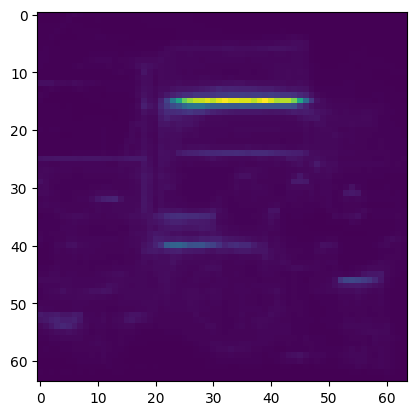

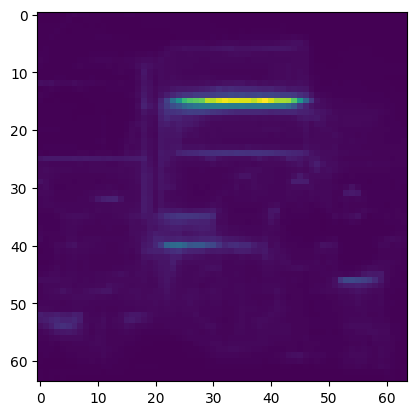

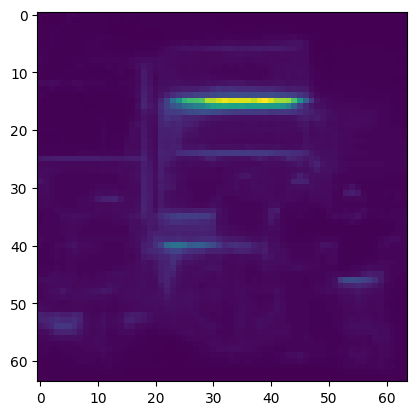

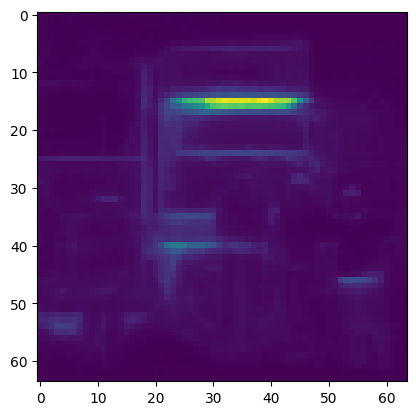

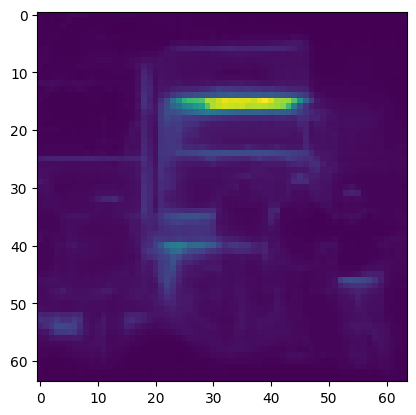

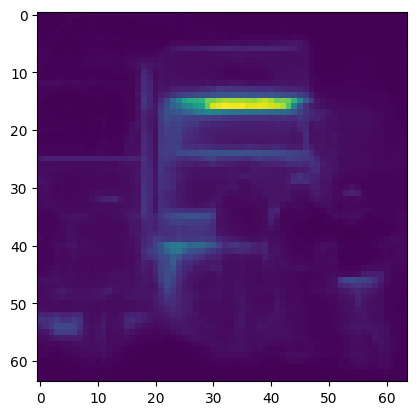

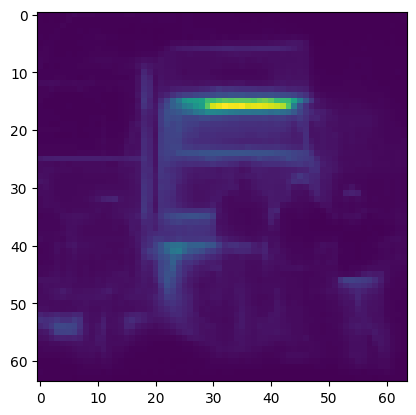

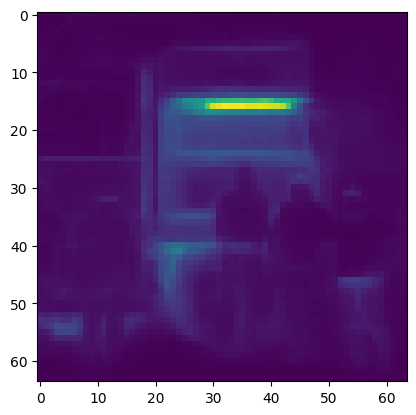

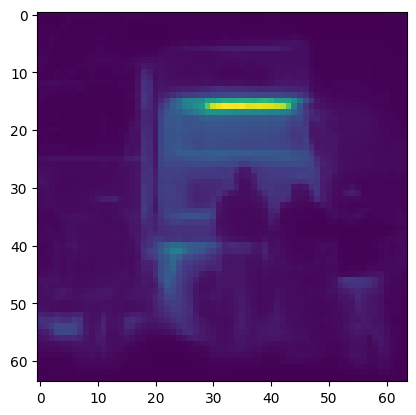

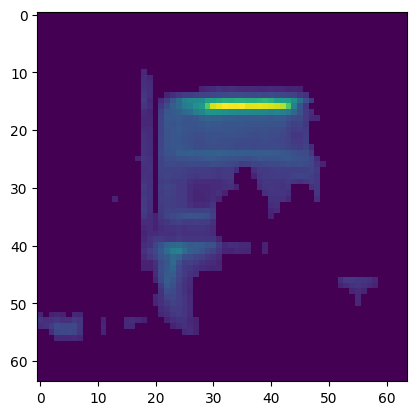

In [56]:
NUM_DIFFUSE = 10
PIXEL_ID = 987 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.015)

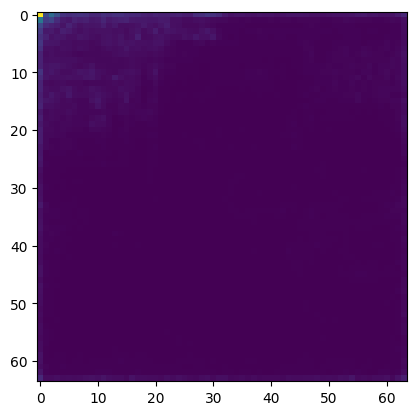

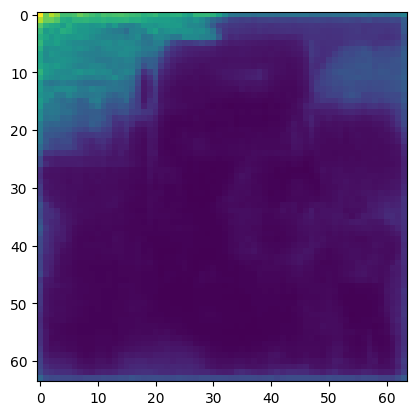

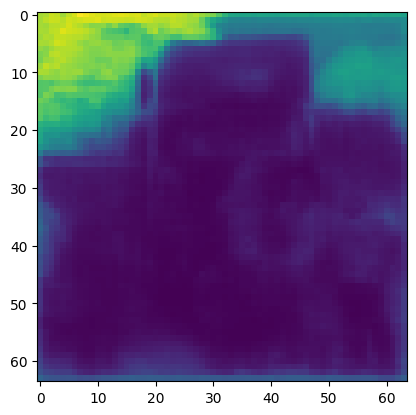

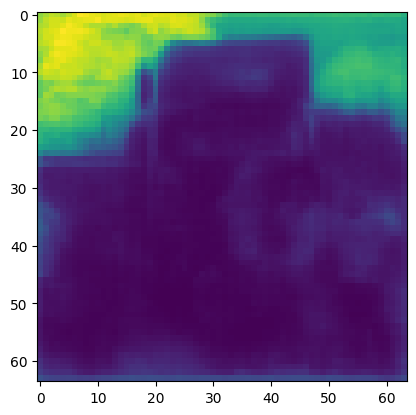

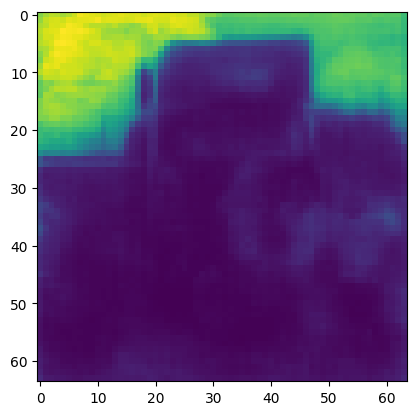

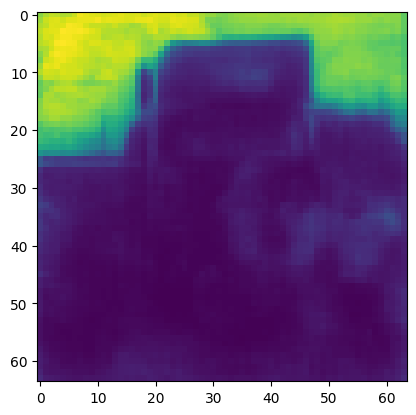

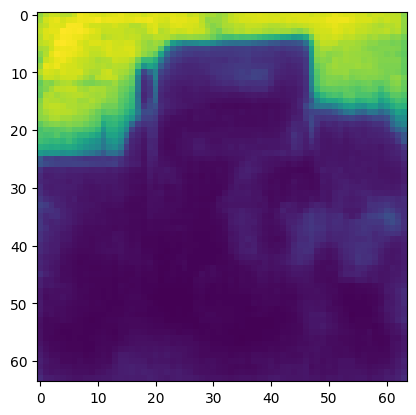

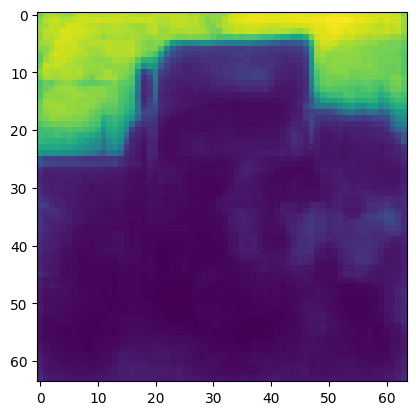

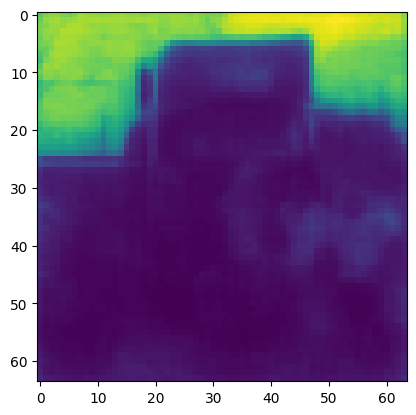

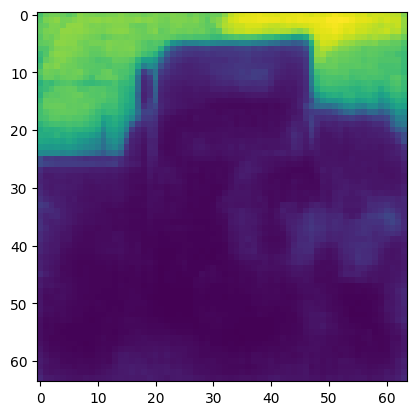

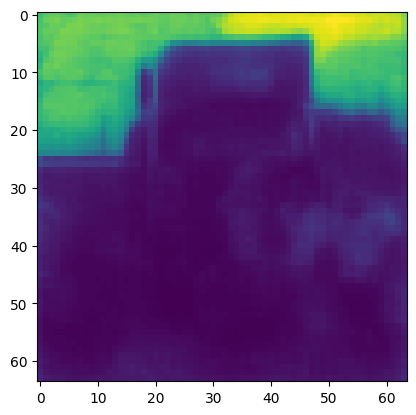

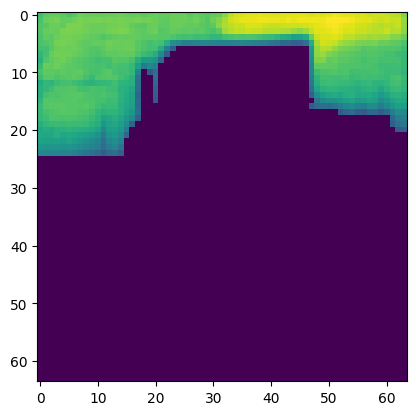

In [57]:
NUM_DIFFUSE = 10
PIXEL_ID = 0 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.015)

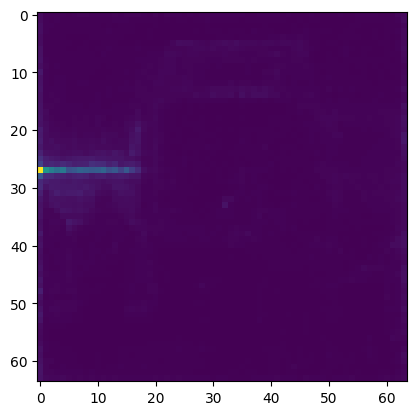

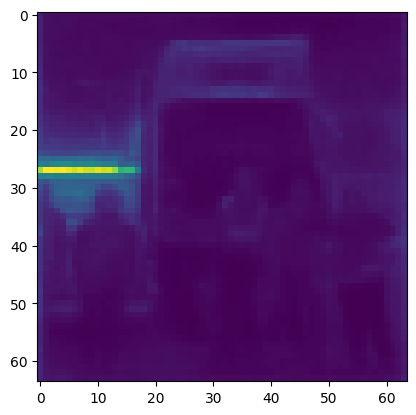

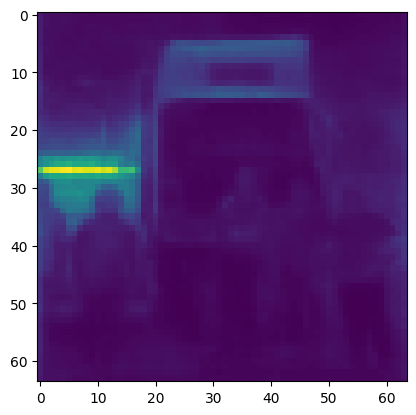

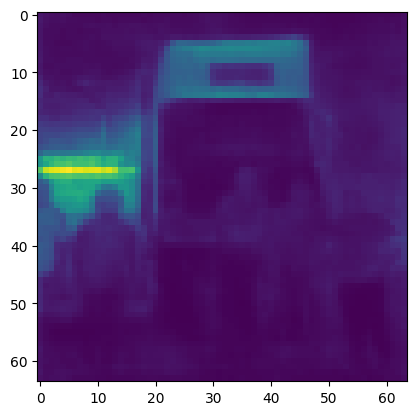

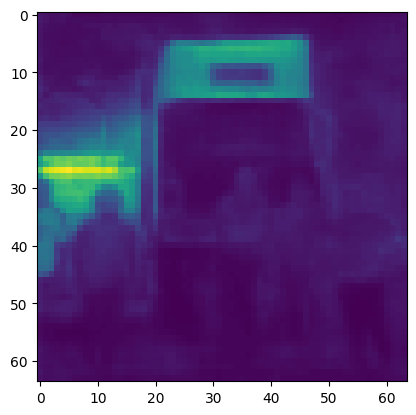

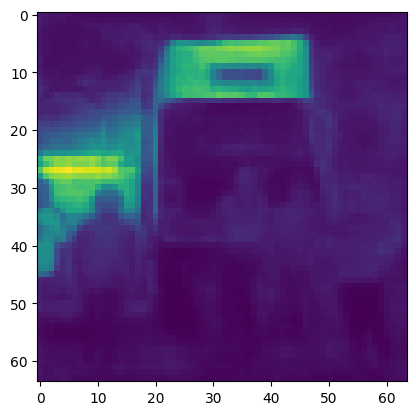

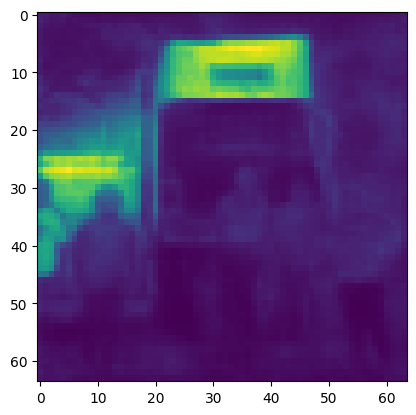

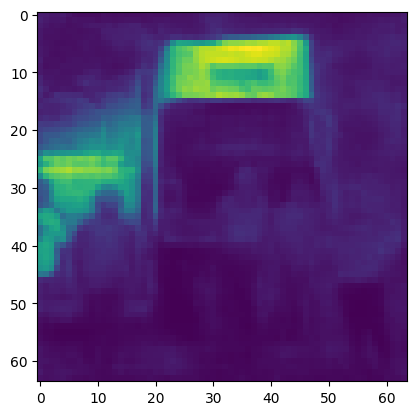

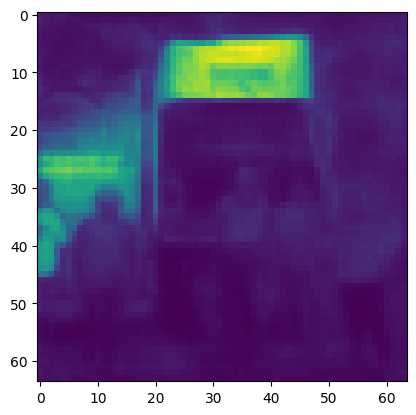

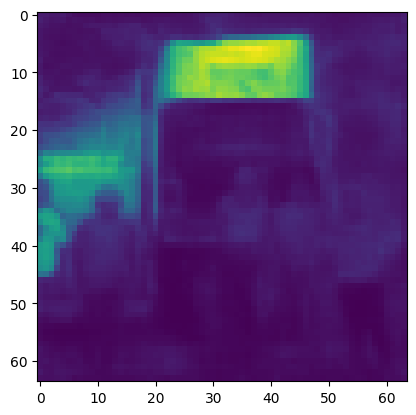

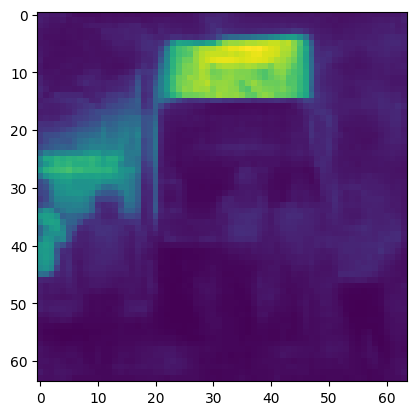

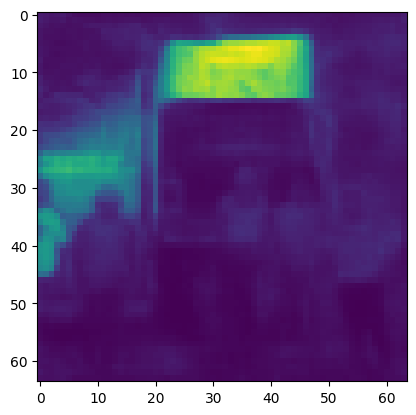

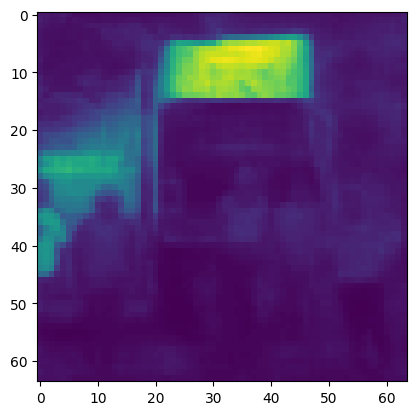

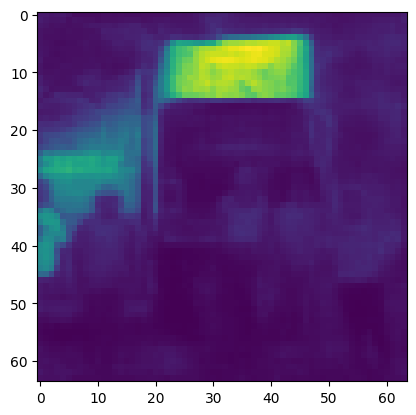

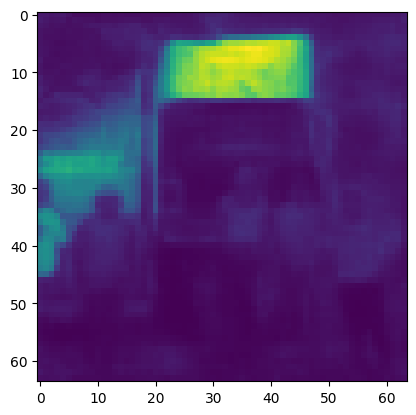

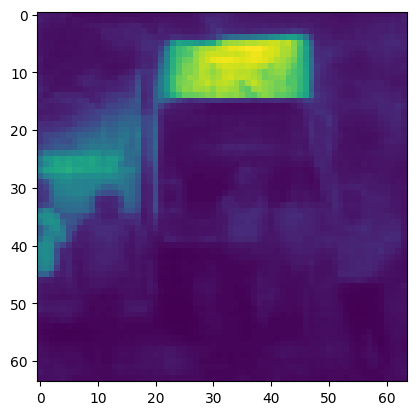

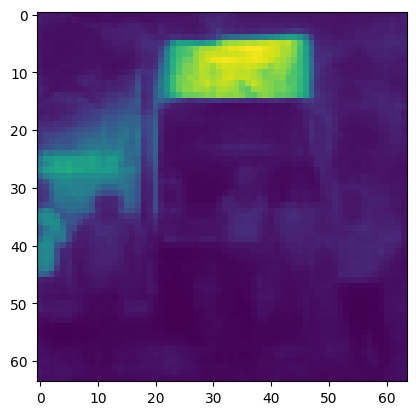

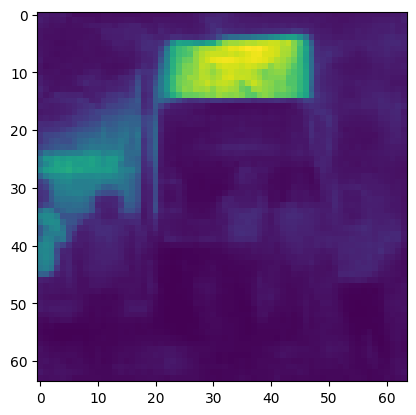

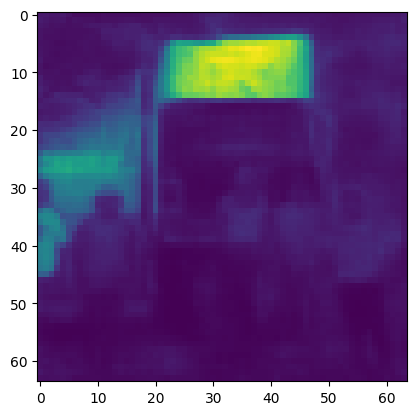

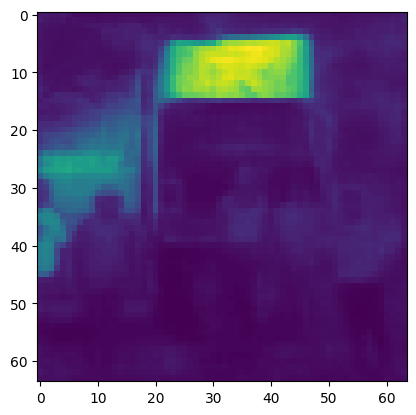

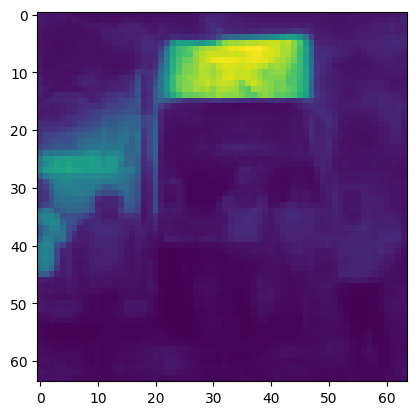

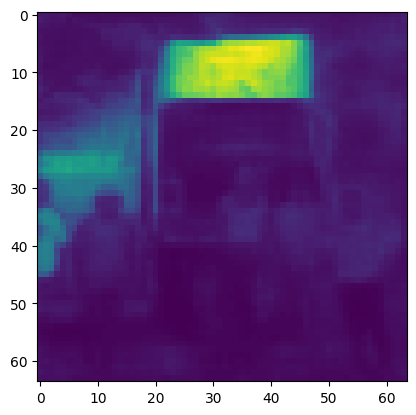

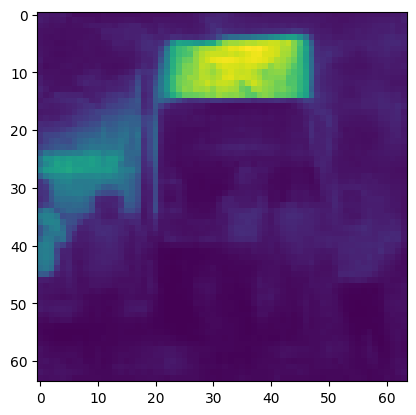

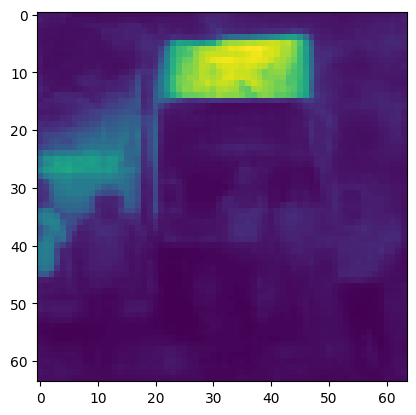

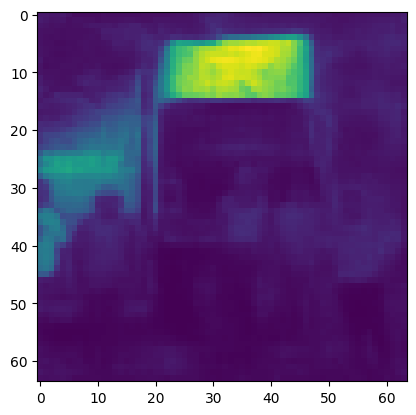

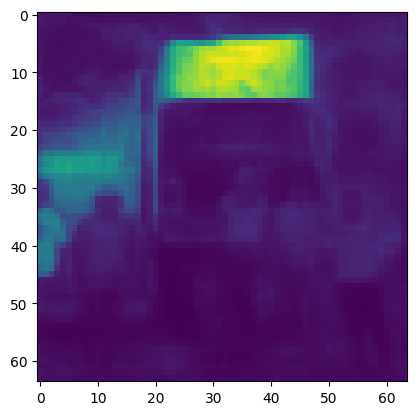

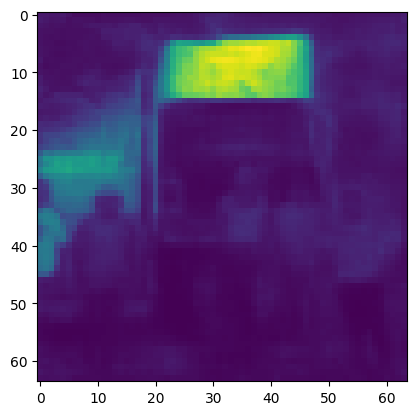

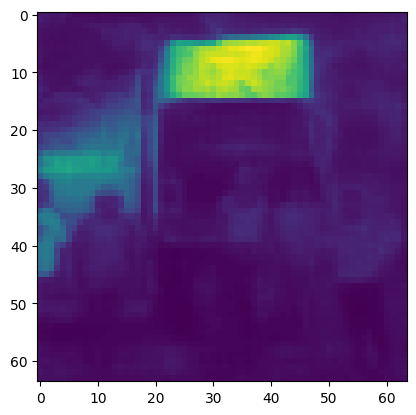

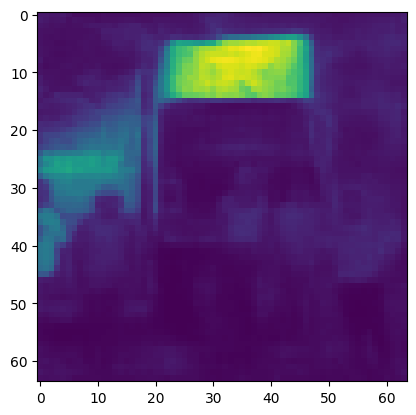

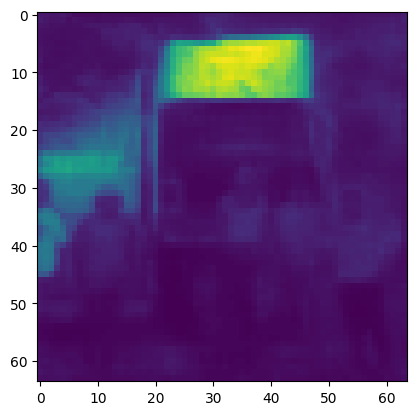

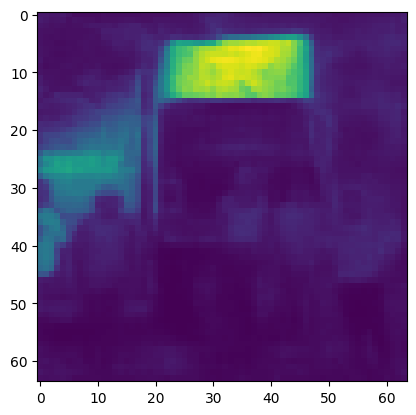

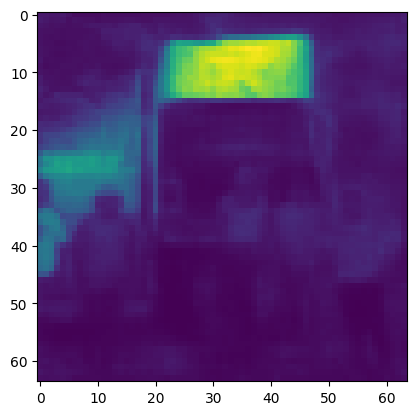

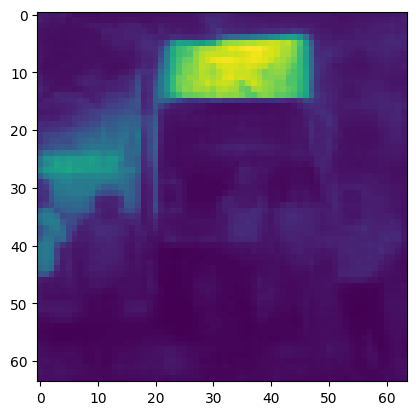

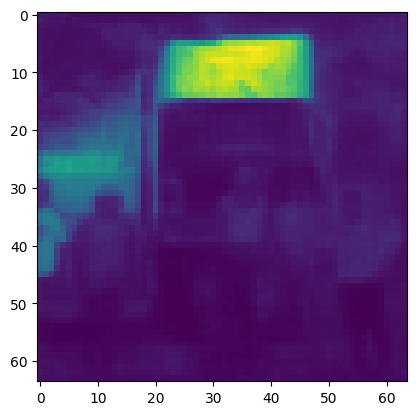

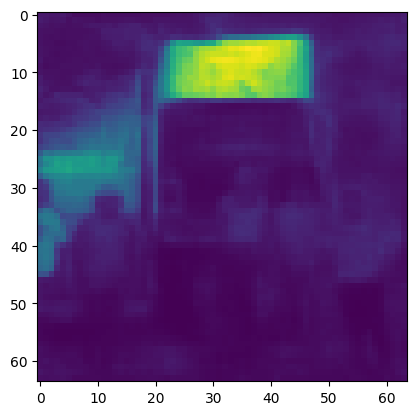

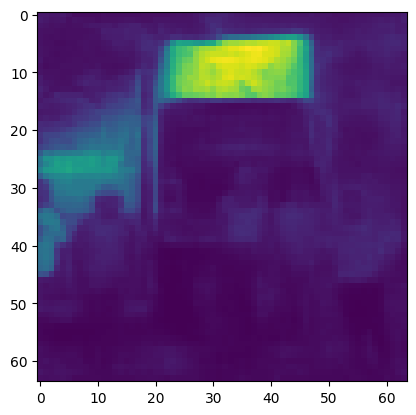

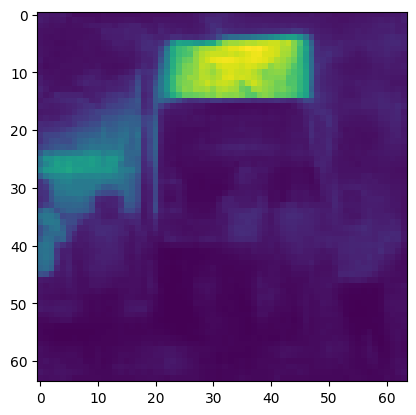

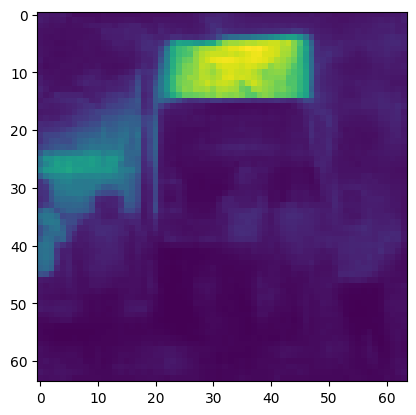

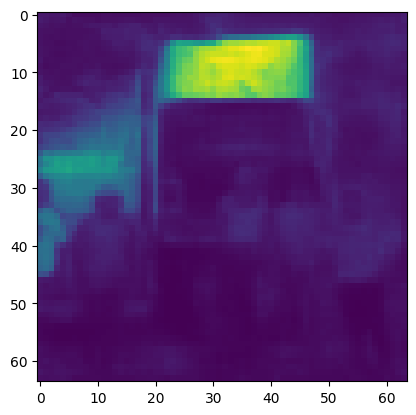

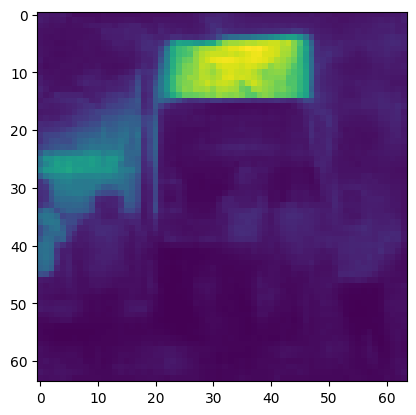

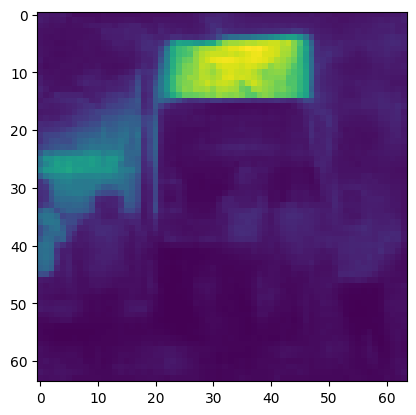

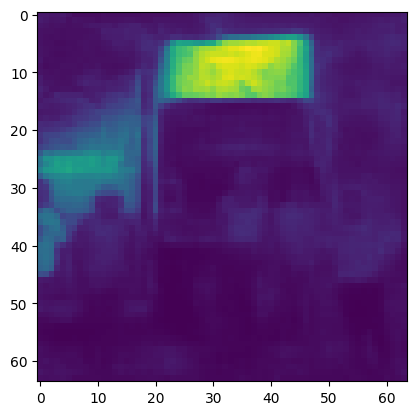

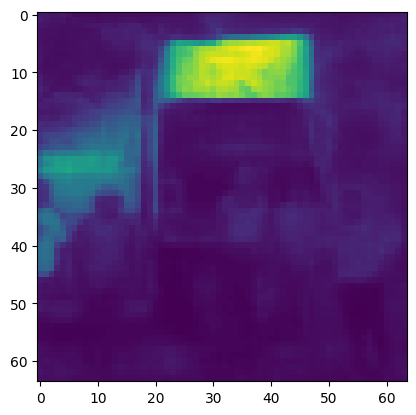

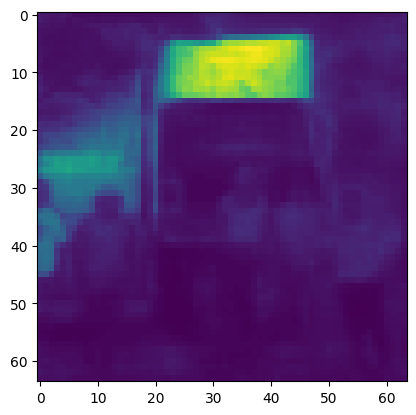

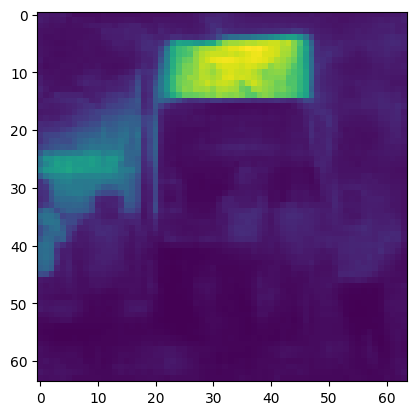

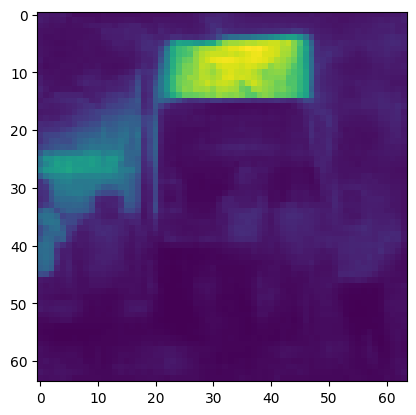

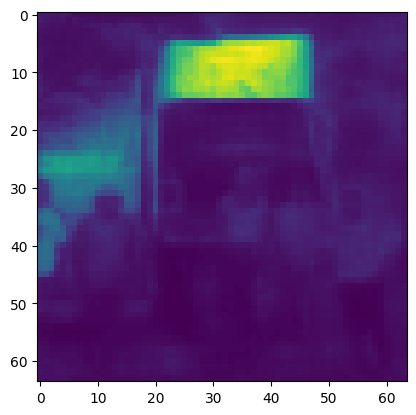

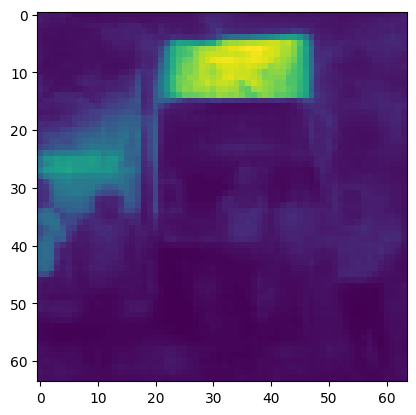

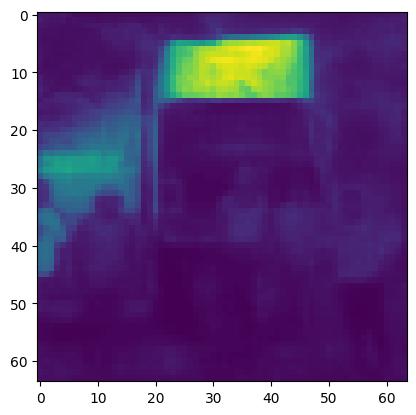

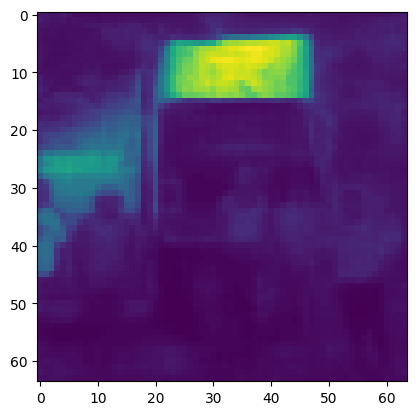

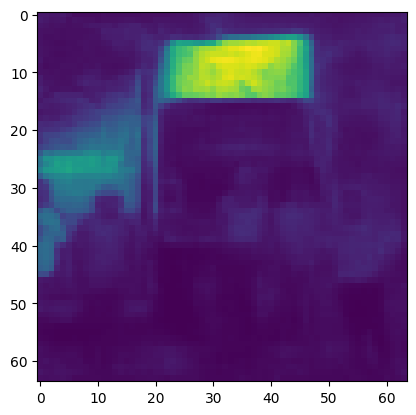

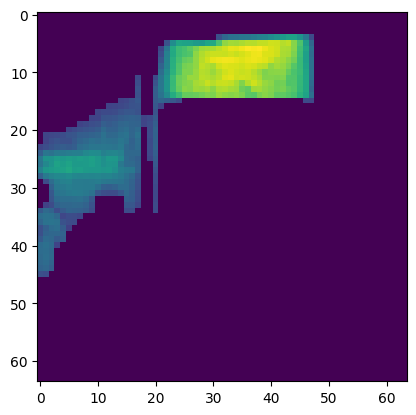

In [63]:
NUM_DIFFUSE = 50
PIXEL_ID = 27*64 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.015)

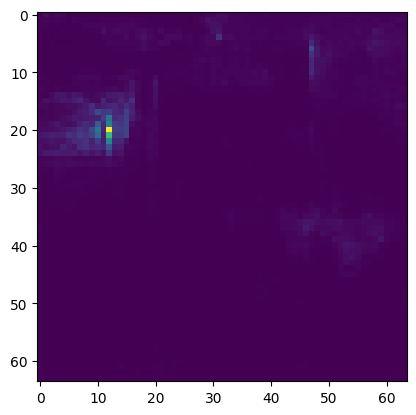

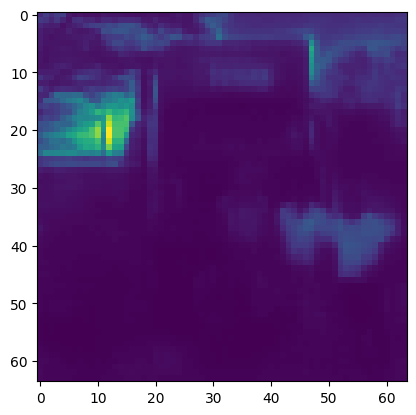

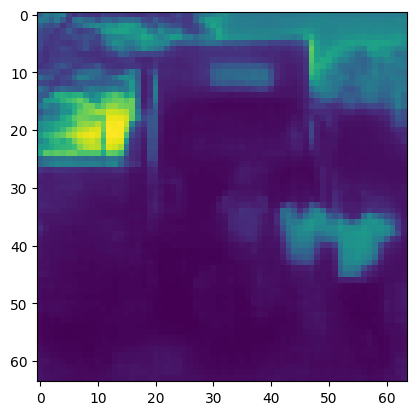

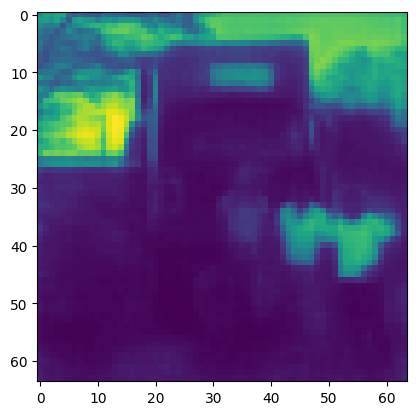

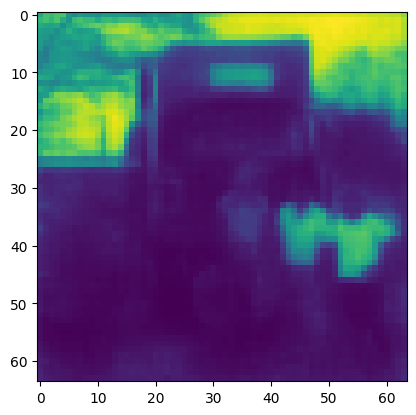

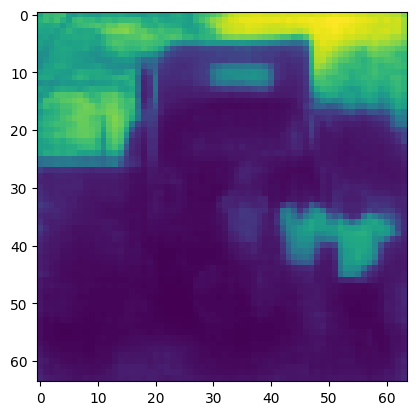

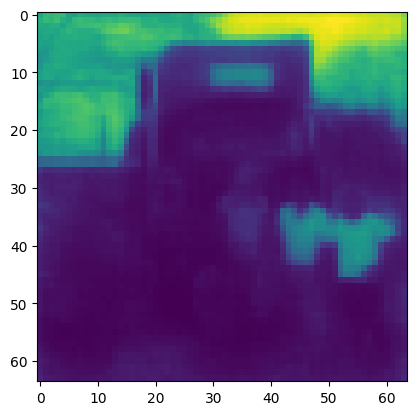

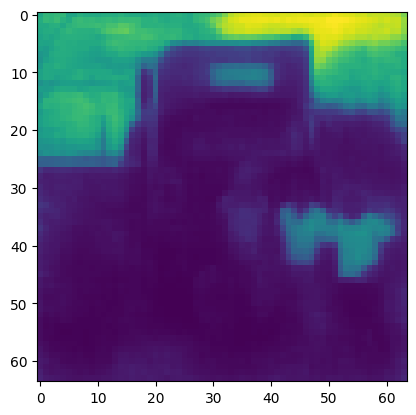

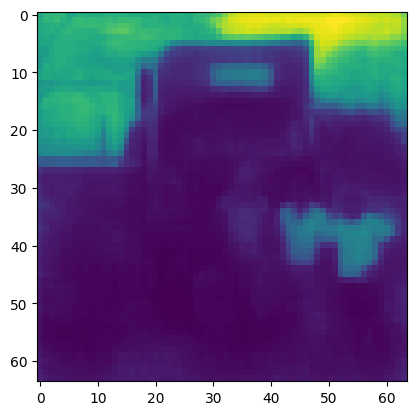

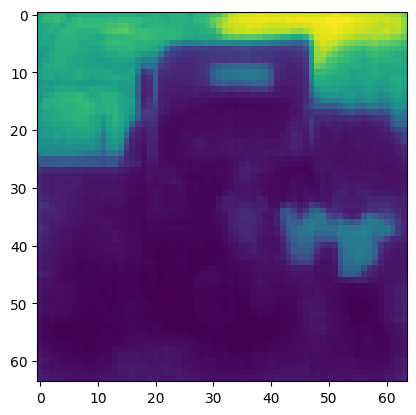

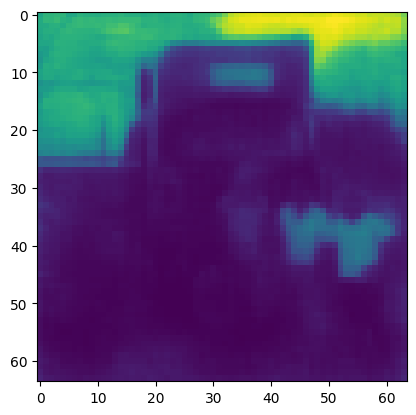

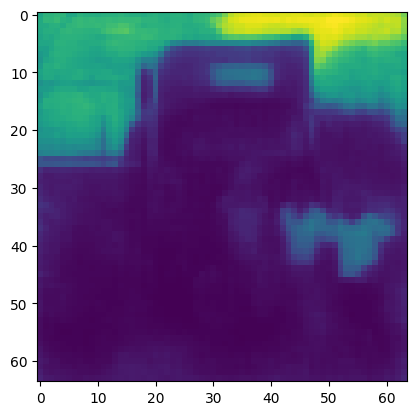

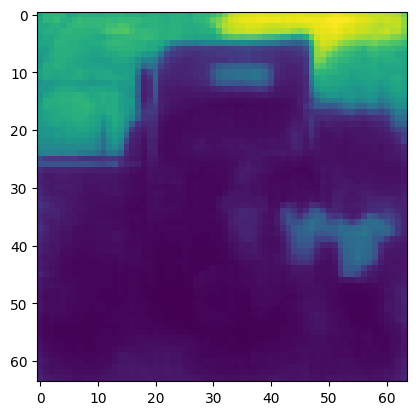

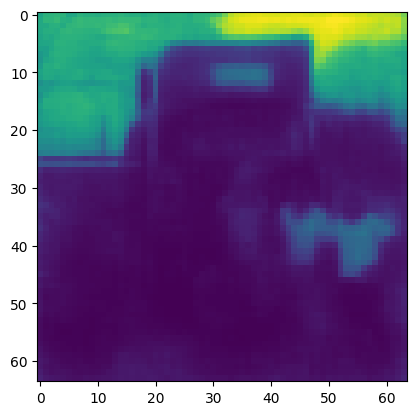

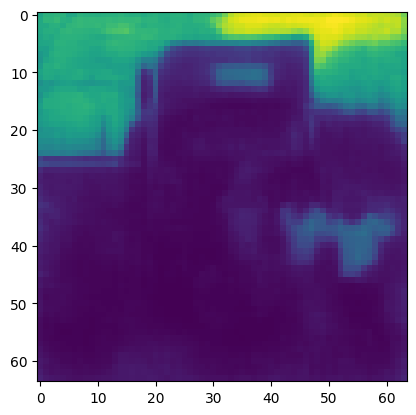

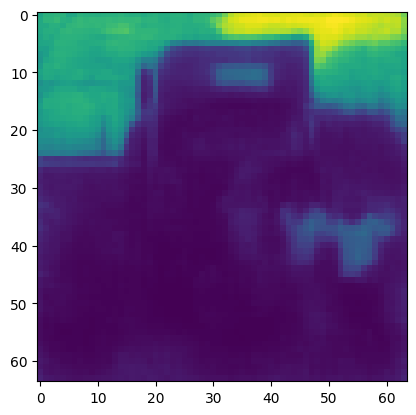

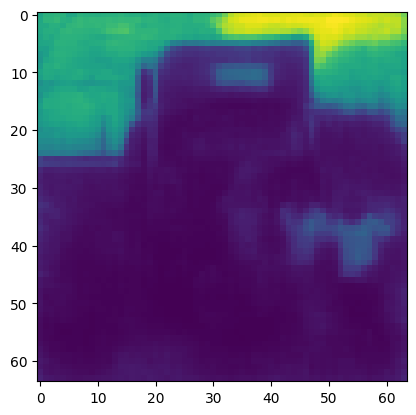

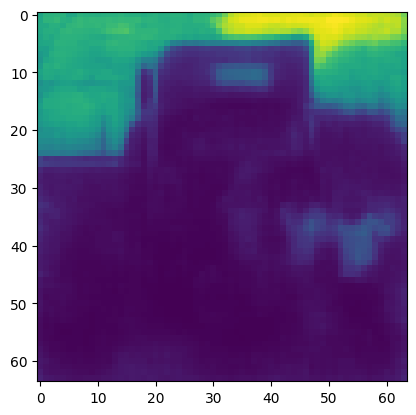

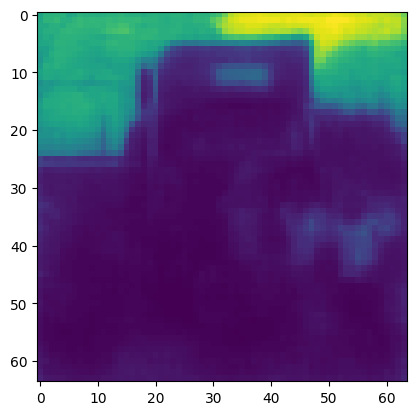

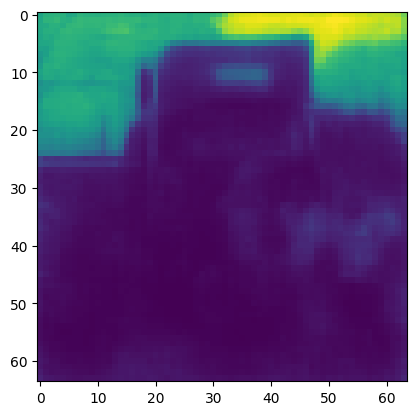

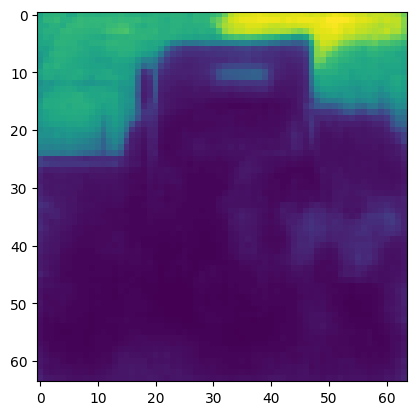

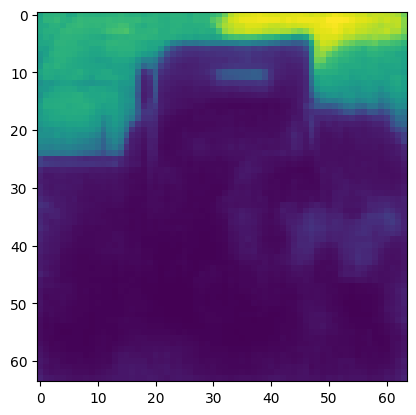

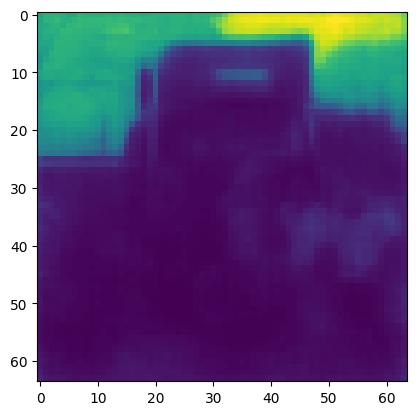

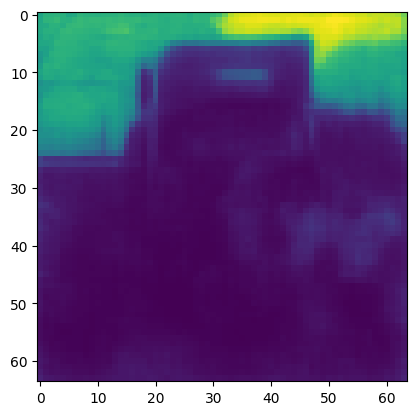

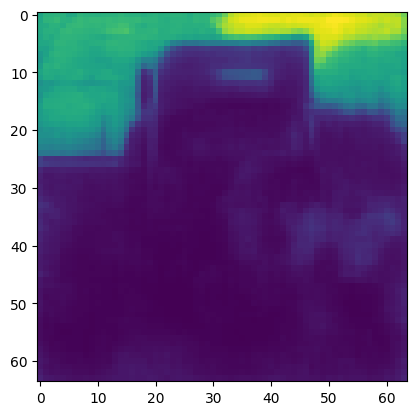

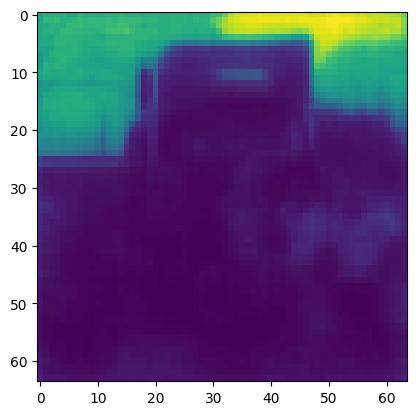

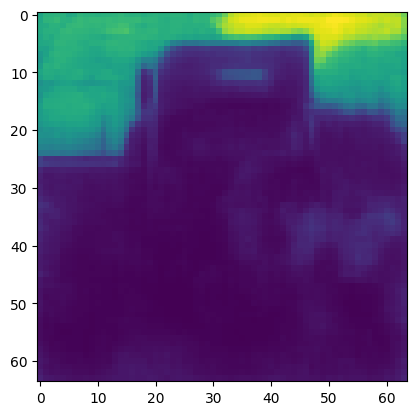

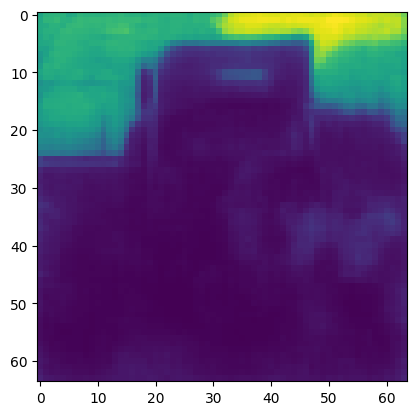

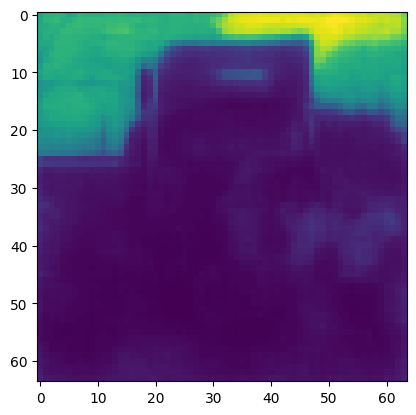

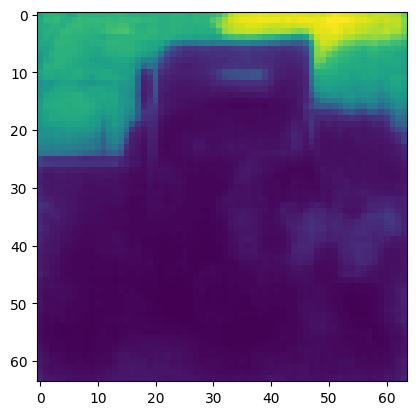

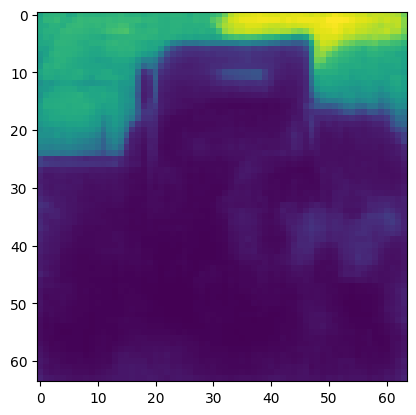

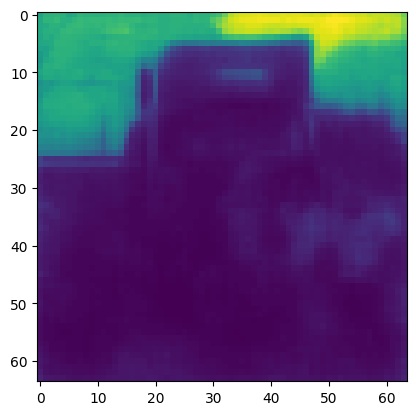

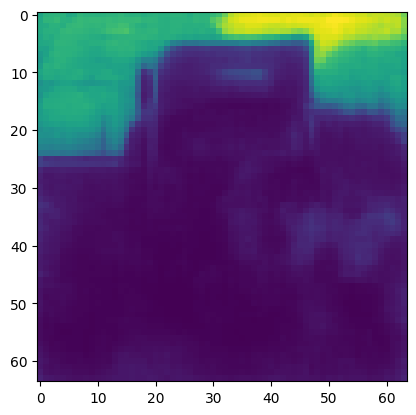

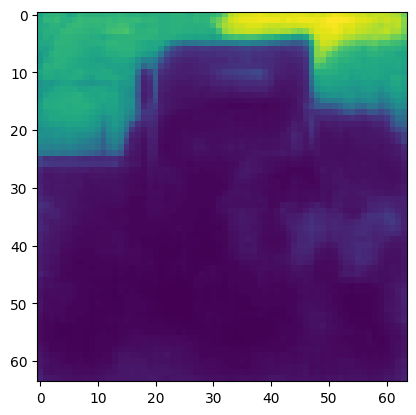

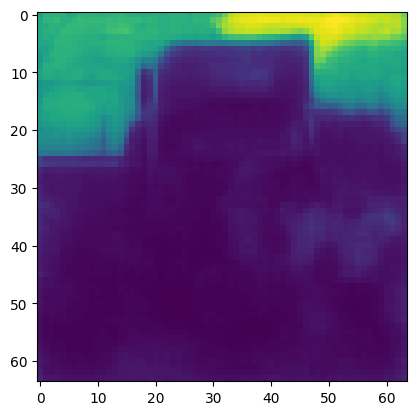

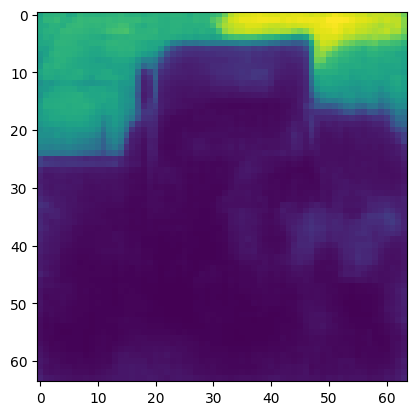

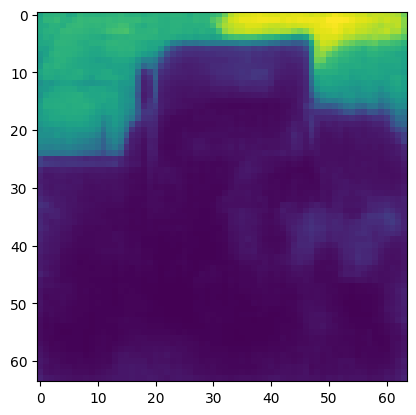

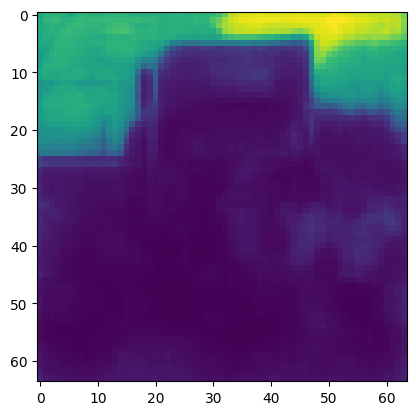

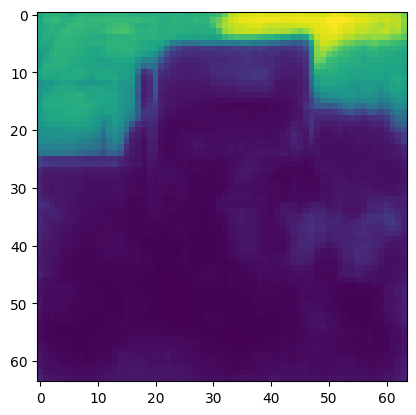

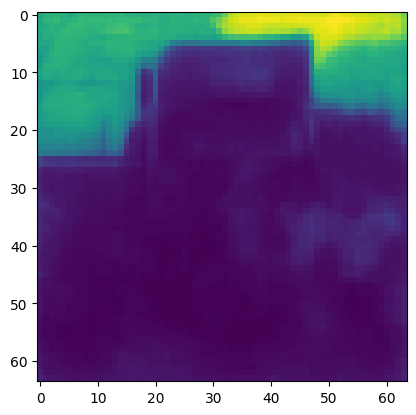

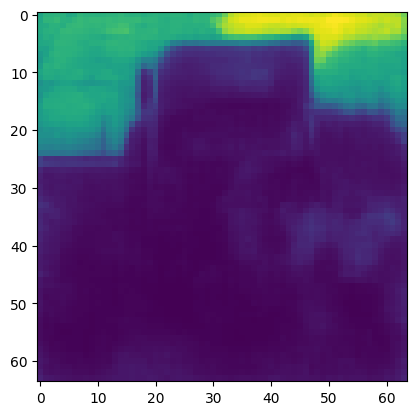

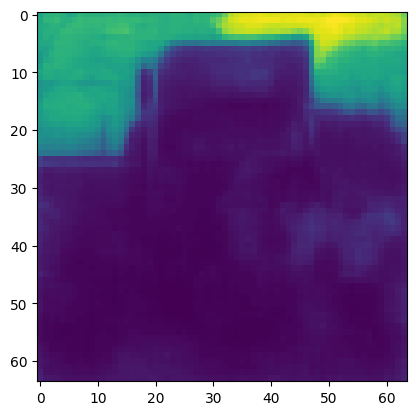

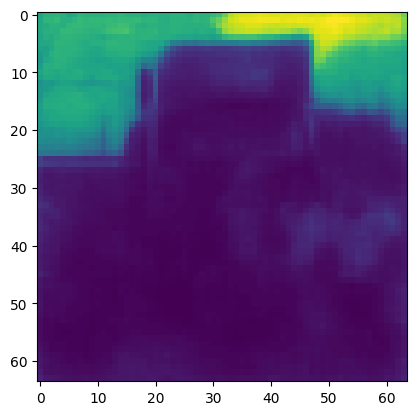

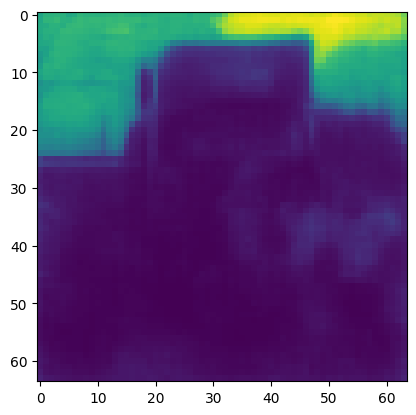

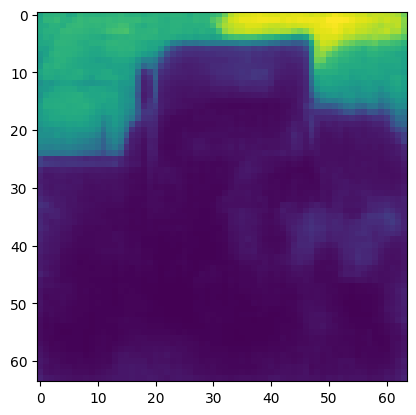

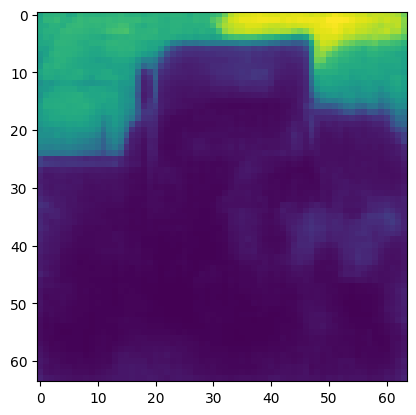

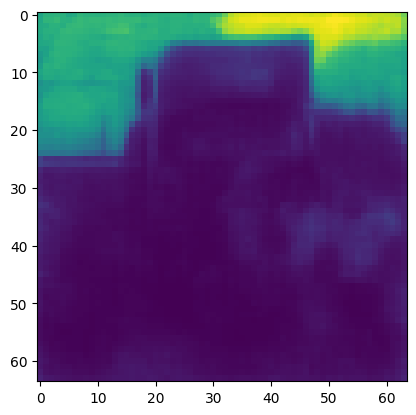

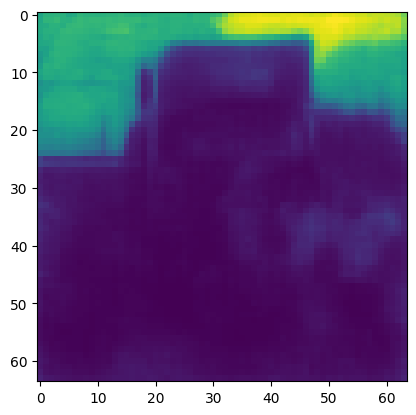

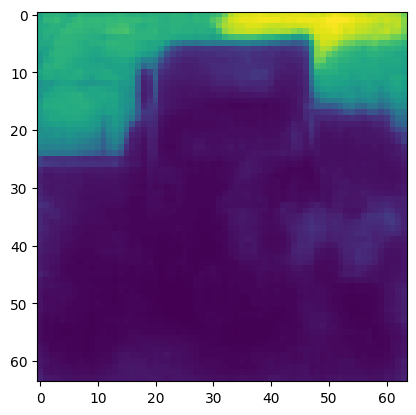

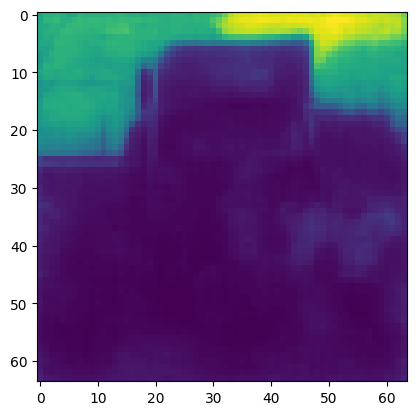

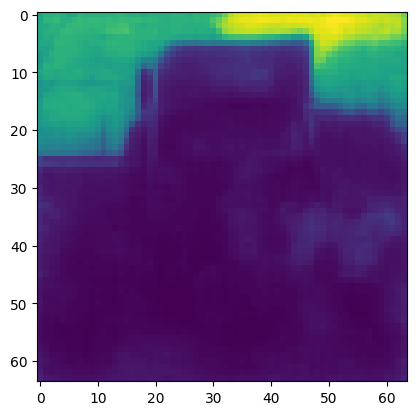

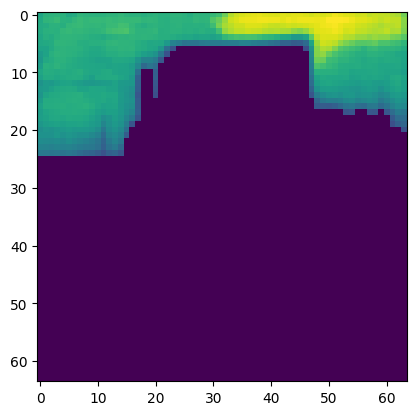

In [62]:
NUM_DIFFUSE = 50
PIXEL_ID = 20*64+12 # Enter Pixel ID
diffuse_from_pixel(PIXEL_ID, NUM_DIFFUSE, 0.015)